
# Description of the Data Source:
The Star Wars API (SWAPI) (https://swapi.dev) is a free RESTful API that provides detailed information on Star Wars characters, films, species, starships, and more. For this assignment, I would like to focus on characters and their interactions (e.g., appearances in the same films) to build a network where nodes are characters, and edges represent shared screen time or film appearances. The categorical variable for this analysis could be the "species" of each character (e.g., "Human," "Droid," "Wookiee").

# Hypothetical Outcome:
By comparing degree centrality and eigenvector centrality across different species,  I will be able to predict which species have more influential or central roles in the Star Wars universe. For example, one might find that "Human" characters are more central due to their frequent appearances in pivotal roles, suggesting a bias towards human characters in the storyline.

## High-Level Plan:
1. Load Data: Use the SWAPI to fetch data on Star Wars characters and their film appearances.
2. Build the Network: Create a network where nodes are characters, and edges represent shared film appearances.
3. Categorical Variable: Assign each character a categorical variable based on their species.
4. Centrality Analysis: Compute degree centrality and eigenvector centrality.
5. Comparative Analysis: Compare centrality measures across different species to analyze their roles in the network.





## Code:

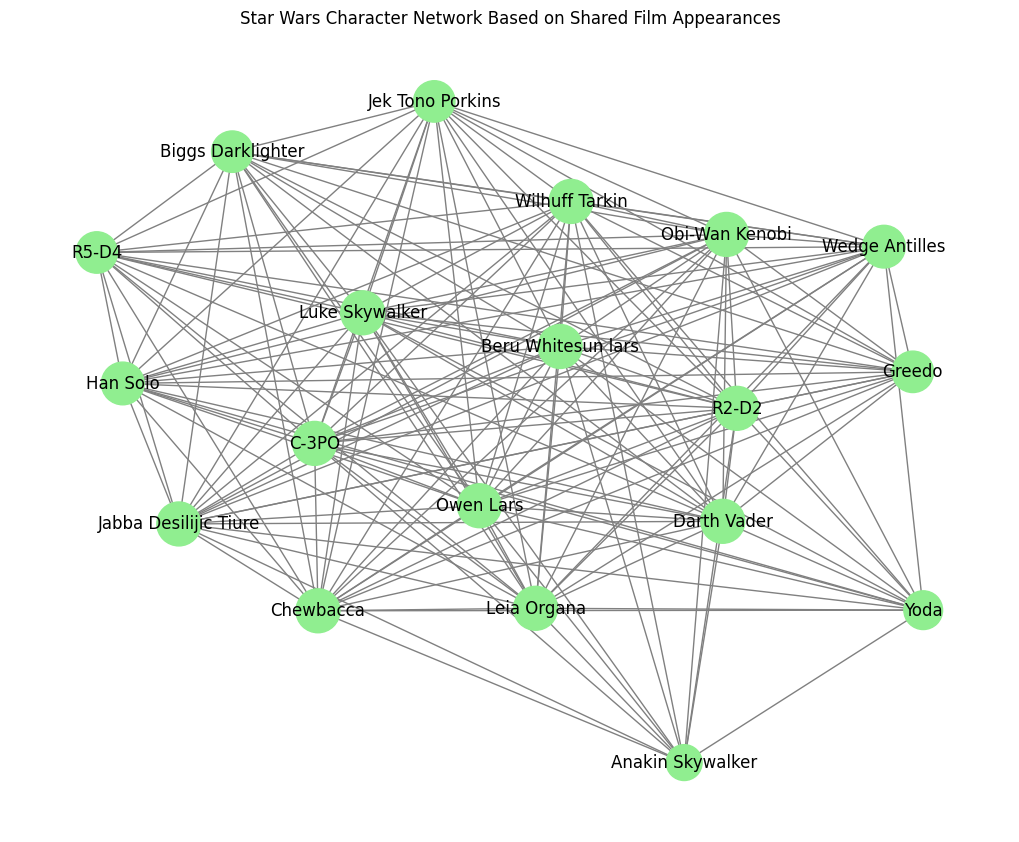

        character  degree_centrality  eigenvector_centrality  species
0  Luke Skywalker                1.0                0.240207  Unknown
1           C-3PO                1.0                0.240207    Droid
2           R2-D2                1.0                0.240207    Droid
3     Darth Vader                1.0                0.240207  Unknown
4     Leia Organa                1.0                0.240207  Unknown


In [2]:
# Step 1: Install Required Libraries
!pip install requests networkx pandas matplotlib

# Step 2: Import Libraries
import requests
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Fetch Star Wars Characters Data from SWAPI
def fetch_star_wars_data(limit=10):
    characters = []
    for i in range(1, limit+1):
        url = f"https://swapi.dev/api/people/{i}/"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            name = data['name']
            species_url = data['species'][0] if data['species'] else None
            films = data['films']

            species = "Unknown"
            if species_url:
                species_response = requests.get(species_url)
                if species_response.status_code == 200:
                    species = species_response.json()['name']

            characters.append({'name': name, 'species': species, 'films': films})
    return characters

# Step 4: Build Network Graph
def build_network(characters):
    G = nx.Graph()

    # Add nodes with species as categorical attribute
    for char in characters:
        G.add_node(char['name'], species=char['species'])

    # Add edges based on shared film appearances
    for i, char1 in enumerate(characters):
        for j, char2 in enumerate(characters):
            if i < j and set(char1['films']) & set(char2['films']):
                G.add_edge(char1['name'], char2['name'])

    return G

# Step 5: Calculate Centrality Measures
def calculate_centrality(G):
    degree_centrality = nx.degree_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

    centrality_data = pd.DataFrame({
        'character': list(degree_centrality.keys()),
        'degree_centrality': list(degree_centrality.values()),
        'eigenvector_centrality': list(eigenvector_centrality.values()),
        'species': [G.nodes[node]['species'] for node in G.nodes]
    })

    return centrality_data

# Step 6: Visualization
def visualize_network(G, centrality_data):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    node_size = [v * 1000 for v in centrality_data['degree_centrality']]
    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='lightgreen', edge_color='gray')
    plt.title("Star Wars Character Network Based on Shared Film Appearances")
    plt.show()

# Step 7: Main Execution
characters = fetch_star_wars_data(limit=20)
G = build_network(characters)
centrality_data = calculate_centrality(G)
visualize_network(G, centrality_data)

print(centrality_data.head())


# Analysis

The network graph visualization of Star Wars characters, combined with the degree centrality and eigenvector centrality metrics, offers deeper insights into character prominence and influence. The graph visually highlights key characters such as Luke Skywalker, C-3PO, and R2-D2 with larger node sizes, representing high degree centrality. The table further confirms this, showing that characters like Luke Skywalker, C-3PO, R2-D2, Darth Vader, and Leia Organa all have a perfect degree centrality of 1.0, indicating that they are directly connected to all other nodes in the network. This suggests their central roles in connecting different parts of the narrative.

However, when examining eigenvector centrality, which measures a node's influence within the network by considering the influence of its neighbors, all these characters show the same score of 0.240. This uniformity might indicate that the network is highly interconnected, where influence is distributed relatively evenly among the main characters, or it could reflect a limitation of the dataset's scope in capturing nuanced influence dynamics. The inclusion of the "species" categorical variable allows for a focused analysis of how species status might impact network centrality. For example, while both "Droid" characters (C-3PO and R2-D2) exhibit the same centrality measures as "Unknown" species characters (e.g., Luke Skywalker and Darth Vader), further analysis could reveal whether droids generally hold unique structural positions within the network compared to human or alien characters.

To enrich this analysis, a comparison of centrality metrics across broader species categories, along with predictive modeling, could uncover whether species type significantly predicts a character's degree or eigenvector centrality. For example, we could hypothesize that "Droid" characters might serve more as connectors (high degree centrality) but might not necessarily hold as much influence (lower eigenvector centrality) unless they are pivotal to the storyline. A regression analysis or a t-test comparing "Droid" versus "Unknown" species could provide statistical backing to these observations, potentially revealing storytelling biases or structural roles assigned to different species within the Star Wars universe.